In [2]:
#Importing all important libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from statsmodels.api import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [3]:
#Reading EnergyCallCentre.csv and displaying the dataframe for analysis
filename = 'EnergyCallCentre.csv'
energyCallCenter = pd.read_csv(filename)
energyCallCenter.head(10)

,Month,VHT,ToD,Agents,CallsOffered,CallsAbandoned,CallsHandled,ASA,Avehandletime
0,Oct-Nov,Off,morning,19,113,0,113,0.00,4.9
1,Oct-Nov,On,afternoo,29,146,0,146,0.00,5.8
2,Oct-Nov,On,evening,5,37,0,37,0.00,4.2
3,Oct-Nov,Off,morning,26,163,0,163,0.13,5.0
4,Oct-Nov,Off,afternoo,21,118,0,118,0.00,5.1
5,Oct-Nov,Off,evening,4,26,0,26,0.00,5.2
6,Oct-Nov,On,morning,9,51,0,51,0.00,5.3
7,Oct-Nov,Off,morning,34,191,0,191,0.22,5.2
8,Oct-Nov,Off,afternoo,31,185,3,182,0.33,5.1
9,Oct-Nov,Off,evening,12,73,0,73,0.00,4.6


In [4]:
#Exploring the shape of the dataframe
energyCallCenter.shape

(504, 9)

In [5]:
#Exploring the Columns of the dataframe
energyCallCenter.columns

Index(['Month', 'VHT', 'ToD', 'Agents', 'CallsOffered', 'CallsAbandoned',
       'CallsHandled', 'ASA', 'Avehandletime'],
      dtype='object')

In [6]:
#Checking the data types of the dataframe
energyCallCenter.dtypes

Month              object
VHT                object
ToD                object
Agents              int64
CallsOffered        int64
CallsAbandoned      int64
CallsHandled        int64
ASA               float64
Avehandletime     float64
dtype: object

In [7]:
#Updating the data types of the dataframe

#Updating Month from object to category data type
energyCallCenter['Month'] = energyCallCenter['Month'].astype('category')

#Updating VHT from object to category data type
energyCallCenter['VHT'] = energyCallCenter['VHT'].astype('category')

#Updating ToD from object to category data type
energyCallCenter['ToD'] = energyCallCenter['ToD'].astype('category')

#Checking the data types of the dataframe
energyCallCenter.dtypes

Month             category
VHT               category
ToD               category
Agents               int64
CallsOffered         int64
CallsAbandoned       int64
CallsHandled         int64
ASA                float64
Avehandletime      float64
dtype: object

In [8]:
#Checking the dataframe for NA values
energyCallCenter.isna().any()

Month             False
VHT               False
ToD               False
Agents            False
CallsOffered      False
CallsAbandoned    False
CallsHandled      False
ASA               False
Avehandletime     False
dtype: bool

In [9]:
#Describing the dataframe
energyCallCenter.describe()

,Agents,CallsOffered,CallsAbandoned,CallsHandled,ASA,Avehandletime
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,21.188492,134.619048,4.898810,129.720238,1.149226,5.103373
std,11.741000,72.383352,11.505538,69.012339,2.855913,1.624443
min,2.000000,20.000000,0.000000,20.000000,0.000000,2.800000
25%,10.000000,62.750000,0.000000,60.000000,0.000000,4.700000
50%,23.000000,151.000000,0.000000,149.500000,0.100000,5.000000
75%,31.000000,191.000000,3.000000,185.250000,0.805000,5.400000
max,58.000000,319.000000,85.000000,315.000000,27.800000,38.700000


In [10]:
"""
From the above description of the dataframe the following can be observed - 
1. The difference between the mean and median (50%) for all the variables is not alarming 
2. All the variables seem to be skewed on the right side as the right tail (max - 75%)
   seem to be longer than left tail (25% - min)

"""

'\nFrom the above description of the dataframe the following can be observed - \n1. The difference between the mean and median (50%) for all the variables is not alarming \n2. All the variables seem to be skewed on the right side as the right tail (max - 75%)\n   seem to be longer than left tail (25% - min)\n\n'

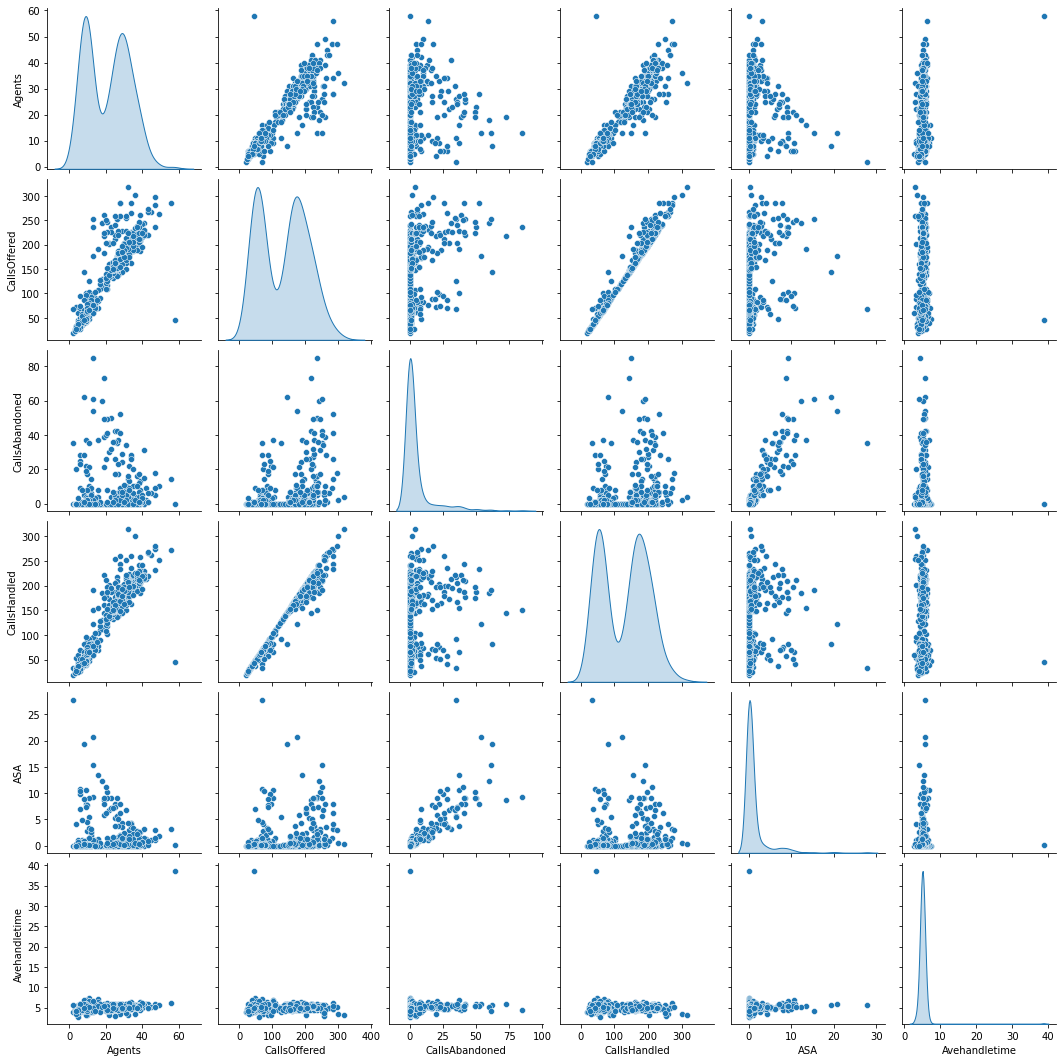

In [11]:
#Scatterplot for all the variables to check for relationship between variables
sns.pairplot(energyCallCenter, diag_kind = 'kde')

In [12]:
"""
From the above Scatterplot the following can be observed - 
1. The scatterplot confirms our finding about the skewness of the variables on the right tail
2. There appears to be an outlier in the data w.r.t Avehandletime

"""

'\nFrom the above Scatterplot the following can be observed - \n1. The scatterplot confirms our finding about the skewness of the variables on the right tail\n2. There appears to be an outlier in the data w.r.t Avehandletime\n\n'

In [13]:
#Possible Outlier in the data
energyCallCenter[energyCallCenter['Avehandletime']>20]

,Month,VHT,ToD,Agents,CallsOffered,CallsAbandoned,CallsHandled,ASA,Avehandletime
229,Oct-Nov,Off,evening,58,45,0,45,0.03,38.7


In [14]:
#Removing the observation that contains the outlier
energyCallCenter = energyCallCenter[energyCallCenter['Avehandletime']<20]
energyCallCenter.describe()

,Agents,CallsOffered,CallsAbandoned,CallsHandled,ASA,Avehandletime
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,21.115308,134.797217,4.908549,129.888668,1.151451,5.036581
std,11.637050,72.344700,11.514913,68.977272,2.858319,0.625403
min,2.000000,20.000000,0.000000,20.000000,0.000000,2.800000
25%,10.000000,63.000000,0.000000,60.000000,0.000000,4.700000
50%,23.000000,151.000000,0.000000,150.000000,0.100000,5.000000
75%,30.500000,191.000000,3.000000,185.500000,0.810000,5.400000
max,56.000000,319.000000,85.000000,315.000000,27.800000,7.300000


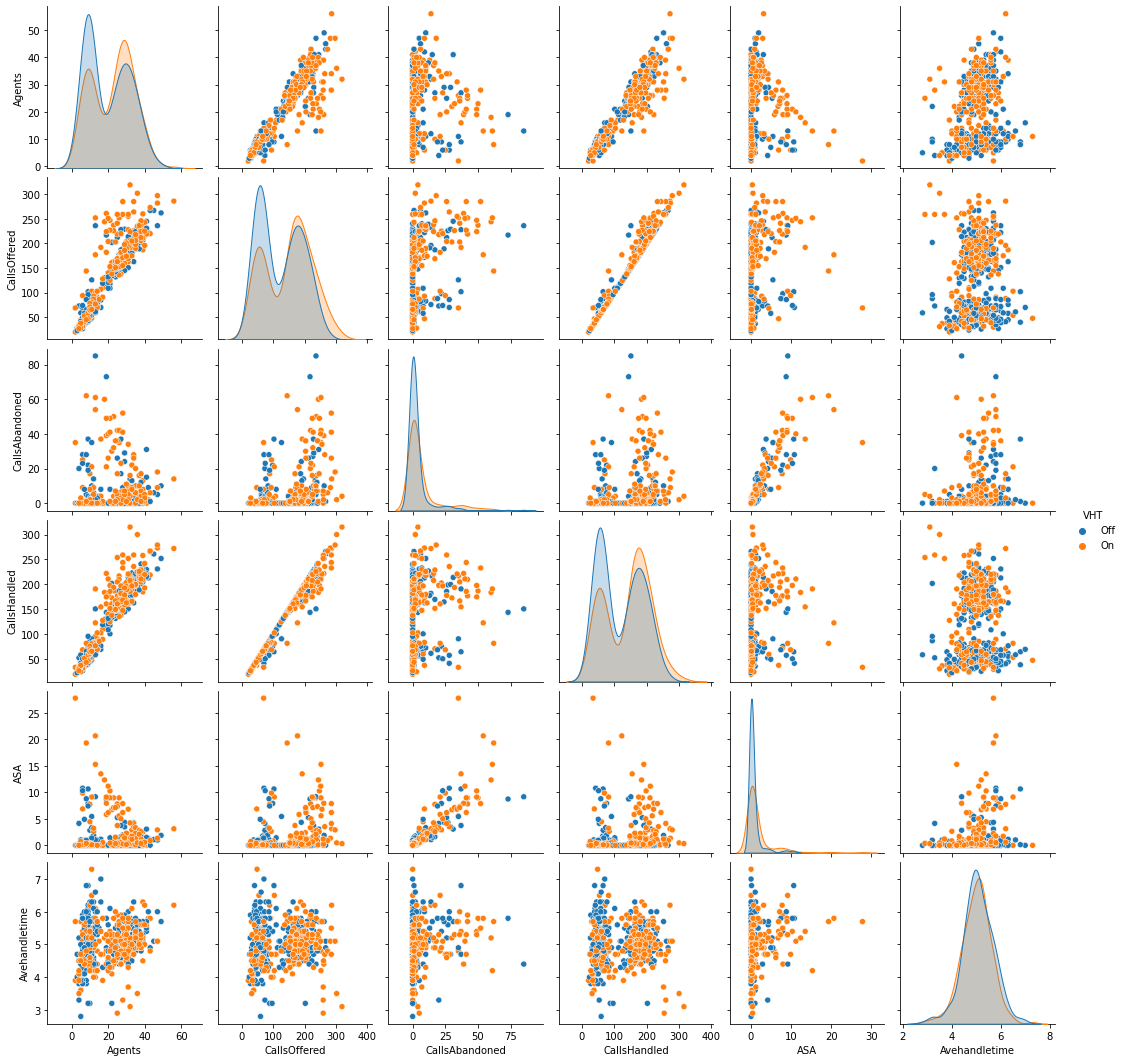

In [15]:
#Scatterplot for all the variables to check for relationship between variables
sns.pairplot(energyCallCenter, diag_kind = 'kde', hue = 'VHT')

In [16]:
"""
From the above Scatterplot the following can be observed - 
1. There appears to be a strong linear relationship between Agents, CallsOffered and CallsHandled. 
   This indicates that while building the model we should avoid using combination of these variables
   as it may introduce multicollinearity in our model. 
2. There appears to be a linear relationship between CallsAbandoned and ASA
3. After removing the outlier the distribution of Avehandletime appears to be normal

"""

'\nFrom the above Scatterplot the following can be observed - \n1. There appears to be a strong linear relationship between Agents, CallsOffered and CallsHandled. \n   This indicates that while building the model we should avoid using combination of these variables\n   as it may introduce multicollinearity in our model. \n2. There appears to be a linear relationship between CallsAbandoned and ASA\n3. After removing the outlier the distribution of Avehandletime appears to be normal\n\n'

In [17]:
#Correlation matrix
energyCallCenter.corr()

,Agents,CallsOffered,CallsAbandoned,CallsHandled,ASA,Avehandletime
Agents,1.000000,0.913298,0.048081,0.949858,-0.070430,0.208206
CallsOffered,0.913298,1.000000,0.365218,0.987851,0.212304,0.059761
CallsAbandoned,0.048081,0.365218,1.000000,0.216110,0.865488,0.144250
CallsHandled,0.949858,0.987851,0.216110,1.000000,0.078186,0.038597
ASA,-0.070430,0.212304,0.865488,0.078186,1.000000,0.175461
Avehandletime,0.208206,0.059761,0.144250,0.038597,0.175461,1.000000


In [18]:
"""
From the above Correlation Matrix the following can be observed - 
1. There appears to be a strong linear relationship between Agents, CallsOffered and CallsHandled
2. There appears to be a linear relationship between CallsAbandoned and ASA
3. There appears to be a linear relationship between CallsAbandoned and CallsOffered

"""

'\nFrom the above Correlation Matrix the following can be observed - \n1. There appears to be a strong linear relationship between Agents, CallsOffered and CallsHandled\n2. There appears to be a linear relationship between CallsAbandoned and ASA\n3. There appears to be a linear relationship between CallsAbandoned and CallsOffered\n\n'

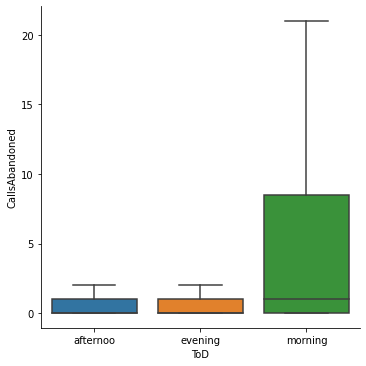

In [19]:
#Boxplot showing relationship between ToD and CallsAbandoned
sns.catplot(x = 'ToD', y = 'CallsAbandoned', data = energyCallCenter, sym = '', kind = 'box')

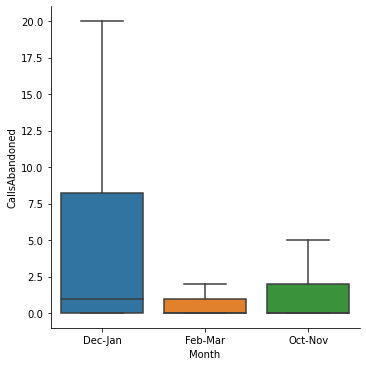

In [20]:
#Boxplot showing relationship between Month and CallsAbandoned
sns.catplot(x = 'Month', y = 'CallsAbandoned', data = energyCallCenter, sym = '', kind = 'box')

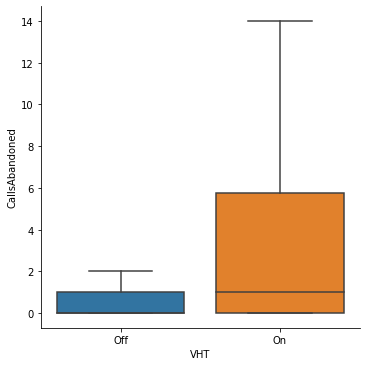

In [21]:
#Boxplot showing relationship between VHT and CallsAbandoned
sns.catplot(x = 'VHT', y = 'CallsAbandoned', data = energyCallCenter, sym = '', kind = 'box')

In [22]:
"""
From the above boxplot of the variables the following can be observed - 
1. ToD - There is not much of a difference in CallsAbandoned during afternoon and evening. It seems that 
         calls are abandoned more during morning. 
2. Month - More calls are abandoned during dec-jan. There is not much difference between the median for 
           feb-mar and oct-nov. However, the upper quartile and max values differ. 
3. VHT - More calls are abandoned with VHT set on. 

"""

'\nFrom the above boxplot of the variables the following can be observed - \n1. ToD - There is not much of a difference in CallsAbandoned during afternoon and evening. It seems that \n         calls are abandoned more during morning. \n2. Month - More calls are abandoned during dec-jan. There is not much difference between the median for \n           feb-mar and oct-nov. However, the upper quartile and max values differ. \n3. VHT - More calls are abandoned with VHT set on. \n\n'

In [23]:
#One Hot Encoding for categorical variables
encode_dict = {True: 1, False: 0}

morning = energyCallCenter['ToD'] == 'morning'
energyCallCenter['ToD_morning'] = morning.map(encode_dict)

evening = energyCallCenter['ToD'] == 'evening'
energyCallCenter['ToD_evening'] = evening.map(encode_dict)

month_dec_jan = energyCallCenter['Month'] == 'Dec-Jan'
energyCallCenter['Month_dec_jan'] = month_dec_jan.map(encode_dict)

month_oct_nov = energyCallCenter['Month'] == 'Oct-Nov'
energyCallCenter['Month_oct_nov'] = month_oct_nov.map(encode_dict)

vht = energyCallCenter['VHT'] == 'On'
energyCallCenter['VHT_on'] = vht.map(encode_dict)

energyCallCenter.head(10)

<ipython-input-23-bbb2958d5ace>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energyCallCenter['ToD_morning'] = morning.map(encode_dict)
<ipython-input-23-bbb2958d5ace>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energyCallCenter['ToD_evening'] = evening.map(encode_dict)
<ipython-input-23-bbb2958d5ace>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,Month,VHT,ToD,Agents,CallsOffered,CallsAbandoned,CallsHandled,ASA,Avehandletime,ToD_morning,ToD_evening,Month_dec_jan,Month_oct_nov,VHT_on
0,Oct-Nov,Off,morning,19,113,0,113,0.00,4.9,1,0,0,1,0
1,Oct-Nov,On,afternoo,29,146,0,146,0.00,5.8,0,0,0,1,1
2,Oct-Nov,On,evening,5,37,0,37,0.00,4.2,0,1,0,1,1
3,Oct-Nov,Off,morning,26,163,0,163,0.13,5.0,1,0,0,1,0
4,Oct-Nov,Off,afternoo,21,118,0,118,0.00,5.1,0,0,0,1,0
5,Oct-Nov,Off,evening,4,26,0,26,0.00,5.2,0,1,0,1,0
6,Oct-Nov,On,morning,9,51,0,51,0.00,5.3,1,0,0,1,1
7,Oct-Nov,Off,morning,34,191,0,191,0.22,5.2,1,0,0,1,0
8,Oct-Nov,Off,afternoo,31,185,3,182,0.33,5.1,0,0,0,1,0
9,Oct-Nov,Off,evening,12,73,0,73,0.00,4.6,0,1,0,1,0


In [24]:
#Splitting data into train and test sets
x = energyCallCenter.drop('CallsAbandoned', axis = 'columns')
y = energyCallCenter[['CallsAbandoned']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)
train = pd.concat([y_train, x_train], axis = 'columns')

In [25]:
model1 = smf.ols(formula = 'CallsAbandoned ~ Agents + ASA + Avehandletime + ToD_morning + Month_dec_jan + VHT_on', data = train)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         CallsAbandoned   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     213.0
Date:                Tue, 20 Apr 2021   Prob (F-statistic):          1.78e-120
Time:                        13:20:59   Log-Likelihood:                -1275.0
No. Observations:                 402   AIC:                             2564.
Df Residuals:                     395   BIC:                             2592.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2588      2.376      0.109      0.913      -4.412       4.930
Agents            0.0714      0.028      2.554      0.011       0.016       0.126
ASA               3.4374      0.108     31.774      0.000       3.225       3.650
Avehandletime    -0.4511      0.477     -0.945      0.345      -1.390       0.487
ToD_morning       2.6620      0.672      3.963      0.000       1.342       3.982
Month_dec_jan     2.5327      0.648      3.907      0.000       1.258       3.807
VHT_on           -0.3227      0.598     -0.540      0.590      -1.498       0.853
==============================================================================
Omnibus:                      163.172   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32866.795
Skew:                           0.401   Prob(JB):                         0.00
Kurtosis:                      47.289   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
mse_resid = result1.mse_resid
rse_resid = np.sqrt(mse_resid)
print('Residual standard error for model1:', np.round(rse_resid,3))

Residual standard error for model1: 5.821


In [27]:
model2 = smf.ols(formula = 'CallsAbandoned ~ CallsOffered + ASA + Avehandletime + ToD_morning + Month_dec_jan + VHT_on', data = train)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         CallsAbandoned   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     235.4
Date:                Tue, 20 Apr 2021   Prob (F-statistic):          4.33e-127
Time:                        13:20:59   Log-Likelihood:                -1259.5
No. Observations:                 402   AIC:                             2533.
Df Residuals:                     395   BIC:                             2561.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.1414      2.299     -0.932      0.352      -6.660       2.378
CallsOffered      0.0269      0.004      6.230      0.000       0.018       0.035
ASA               3.2959      0.103     32.094      0.000       3.094       3.498
Avehandletime    -0.2659      0.441     -0.603      0.547      -1.132       0.601
ToD_morning       1.6799      0.652      2.577      0.010       0.398       2.962
Month_dec_jan     2.4123      0.624      3.866      0.000       1.186       3.639
VHT_on           -0.5875      0.576     -1.020      0.308      -1.720       0.545
==============================================================================
Omnibus:                      173.293   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29536.305
Skew:                           0.620   Prob(JB):                         0.00
Kurtosis:                      44.974   Cond. No.                     1.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
mse_resid = result2.mse_resid
rse_resid = np.sqrt(mse_resid)
print('Residual standard error for model2:', np.round(rse_resid,3))

Residual standard error for model2: 5.6


In [29]:
#
model3 = smf.ols(formula = 'CallsAbandoned ~ CallsOffered + ASA + ToD_morning + Month_dec_jan + VHT_on', data = train)
result3 = model3.fit() 
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         CallsAbandoned   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     282.9
Date:                Tue, 20 Apr 2021   Prob (F-statistic):          2.93e-128
Time:                        13:20:59   Log-Likelihood:                -1259.7
No. Observations:                 402   AIC:                             2531.
Df Residuals:                     396   BIC:                             2555.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.4743      0.634     -5.477      0.000      -4.721      -2.227
CallsOffered      0.0268      0.004      6.210      0.000       0.018       0.035
ASA               3.2845      0.101     32.571      0.000       3.086       3.483
ToD_morning       1.7257      0.647      2.667      0.008       0.454       2.998
Month_dec_jan     2.4106      0.623      3.867      0.000       1.185       3.636
VHT_on           -0.5656      0.574     -0.985      0.325      -1.695       0.564
==============================================================================
Omnibus:                      175.214   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29439.058
Skew:                           0.651   Prob(JB):                         0.00
Kurtosis:                      44.903   Cond. No.                         398.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
mse_resid = result3.mse_resid
rse_resid = np.sqrt(mse_resid)
print('Regression standard error for model3:', np.round(rse_resid,3))

Regression standard error for model3: 5.596


In [31]:
residuals = result3.resid
pred_values = pd.DataFrame(residuals)
predicted = result3.fittedvalues
pred_values['predicted'] = predicted
pred_values.columns = ['residuals', 'predicted']
pred_values.sort_index().head()

,residuals,predicted
0,-1.274449,1.274449
1,0.133976,-0.133976
2,3.050045,-3.050045
3,-3.039074,3.039074
7,-4.083756,4.083756


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,  65., 242.,
         73.,   9.,   5.,   2.,   0.,   0.,   0.,   1.,   1.]),
 array([-54.11385769, -49.01286777, -43.91187785, -38.81088793,
        -33.70989801, -28.60890809, -23.50791816, -18.40692824,
        -13.30593832,  -8.2049484 ,  -3.10395848,   1.99703144,
          7.09802137,  12.19901129,  17.30000121,  22.40099113,
         27.50198105,  32.60297098,  37.7039609 ,  42.80495082,
         47.90594074]),
 <BarContainer object of 20 artists>)

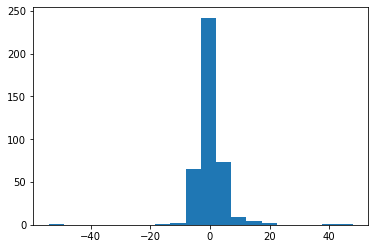

In [32]:
plt.hist(pred_values['residuals'], bins = 20)

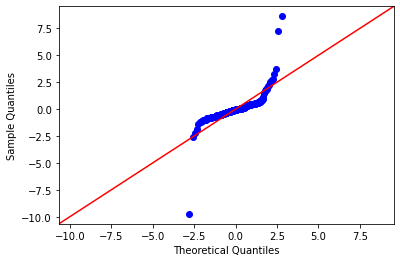

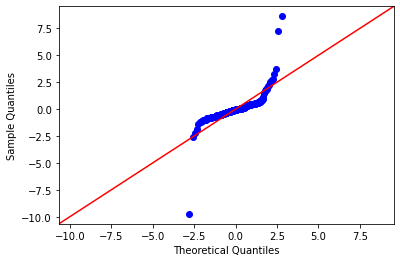

In [33]:
qqplot(data = pred_values['residuals'], fit = True, line = '45')

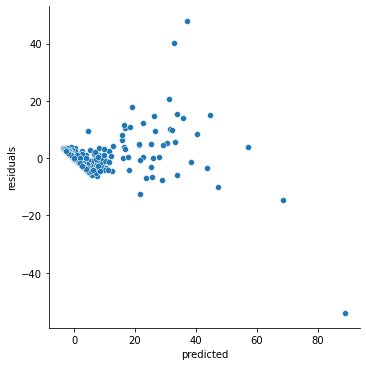

In [34]:
sns.relplot(x = 'predicted', y = 'residuals', data = pred_values, kind = 'scatter')

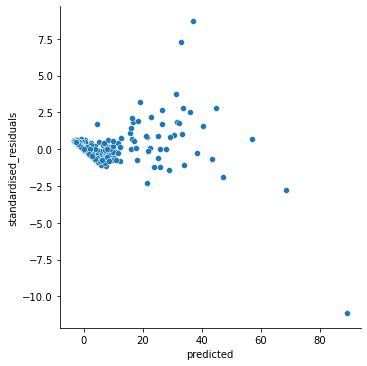

In [41]:
std_resid = result3.get_influence().resid_studentized_internal
pred_values['standardised_residuals'] = std_resid
sns.relplot(x = 'predicted', y = 'standardised_residuals', data = pred_values, kind = 'scatter')

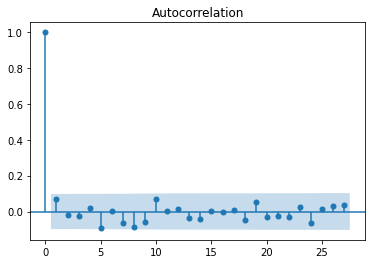

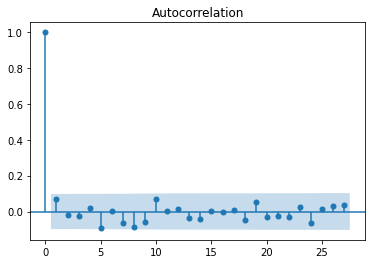

In [36]:
plot_acf(pred_values['residuals'])

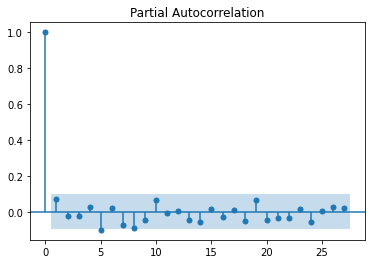

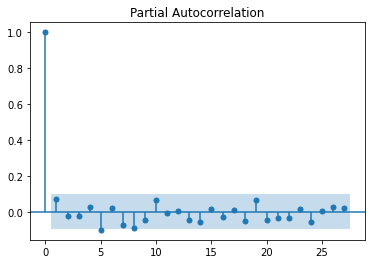

In [37]:
plot_pacf(pred_values['residuals'])